In [ ]:
import sys
sys.path.append('/notebooks/MOD2NN')

In [2]:
import os
import json
import glob
import re

from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from CNN.module.lib.layers import *
from Faraday.two_dim.module.lib.layers import *

from Faraday.two_dim import matplotlib_style
matplotlib_style.paper()

tf.random.set_seed(1)

print("TensorFlow:", tf.__version__)
print("Python:", sys.version)

plt.rcParams['font.size'] = 18

TensorFlow: 2.9.1
Python: 3.9.13 (main, May 23 2022, 22:01:06) 
[GCC 9.4.0]


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.sqrt(x_train.astype("float32") / 255.0)
x_test = np.sqrt(x_test.astype("float32") / 255.0)

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
path = 'trained_model/20230110/intens/0'

model = tf.keras.models.load_model(path)

# 1layer

In [77]:
z = np.linspace(0, 0.7e-3, 60)

images1 = np.zeros((len(z), 100, 100))

for i in range(len(z)):
    x = AngularSpectrum((100,100), wavelength=633e-9, n=1.5, d=1.0e-6,z=z[i])(model.layers[2].output)
    x = ElectricFieldToIntensity((100, 100))(x)
    hidden_model = tf.keras.Model(inputs=model.inputs, outputs=x)
    pred = hidden_model.predict(x_test[0:1,:,:])
    images1[i,:,:] = pred[0,:,:]

1/1 [==============================] - 0s 86ms/step


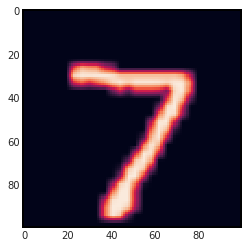

In [46]:
plt.imshow(images1[0,:,:])

In [78]:
z = np.linspace(0, 0.7e-3, 60)

images2 = np.zeros((len(z), 100, 100))

for i in range(len(z)):
    x = AngularSpectrum((100,100), wavelength=633e-9, n=1.5, d=1.0e-6,z=z[i])(model.layers[4].output)
    x = ElectricFieldToIntensity((100, 100))(x)
    hidden_model = tf.keras.Model(inputs=model.inputs, outputs=x)
    pred = hidden_model.predict(x_test[0:1,:,:])
    images2[i,:,:] = pred[0,:,:]

1/1 [==============================] - 0s 117ms/step


In [79]:
z = np.linspace(0, 0.7e-3, 60)

images3 = np.zeros((len(z), 100, 100))

for i in range(len(z)):
    x = AngularSpectrum((100,100), wavelength=633e-9, n=1.5, d=1.0e-6,z=z[i])(model.layers[6].output)
    x = ElectricFieldToIntensity((100, 100))(x)
    hidden_model = tf.keras.Model(inputs=model.inputs, outputs=x)
    pred = hidden_model.predict(x_test[0:1,:,:])
    images3[i,:,:] = pred[0,:,:]

1/1 [==============================] - 0s 131ms/step


In [80]:
z = np.linspace(0, 0.7e-3, 60)

images4 = np.zeros((len(z), 100, 100))

for i in range(len(z)):
    x = AngularSpectrum((100,100), wavelength=633e-9, n=1.5, d=1.0e-6,z=z[i])(model.layers[8].output)
    x = ElectricFieldToIntensity((100, 100))(x)
    hidden_model = tf.keras.Model(inputs=model.inputs, outputs=x)
    pred = hidden_model.predict(x_test[0:1,:,:])
    images4[i,:,:] = pred[0,:,:]

1/1 [==============================] - 0s 156ms/step


In [81]:
z = np.linspace(0, 0.7e-3, 60)

images5 = np.zeros((len(z), 100, 100))

for i in range(len(z)):
    x = AngularSpectrum((100,100), wavelength=633e-9, n=1.5, d=1.0e-6,z=z[i])(model.layers[10].output)
    x = ElectricFieldToIntensity((100, 100))(x)
    hidden_model = tf.keras.Model(inputs=model.inputs, outputs=x)
    pred = hidden_model.predict(x_test[0:1,:,:])
    images5[i,:,:] = pred[0,:,:]

1/1 [==============================] - 0s 188ms/step


In [82]:
z = np.linspace(0, 0.7e-3, 60)

images6 = np.zeros((len(z), 100, 100))

for i in range(len(z)):
    x = AngularSpectrum((100,100), wavelength=633e-9, n=1.5, d=1.0e-6,z=z[i])(model.layers[12].output)
    x = ElectricFieldToIntensity((100, 100))(x)
    hidden_model = tf.keras.Model(inputs=model.inputs, outputs=x)
    pred = hidden_model.predict(x_test[0:1,:,:])
    images6[i,:,:] = pred[0,:,:]

1/1 [==============================] - 0s 333ms/step


In [104]:
images = np.vstack([images1, images2, images3, images4, images5, images6])

In [106]:
input_copys = np.zeros((50, 100,100))
out_copys = np.zeros((50, 100, 100))
for i in range(50):
    input_copys[i,:,:] = images[0,:,:]
    out_copys[i,:,:] = images[-1,:,:]

images = np.vstack([input_copys, images, out_copys])

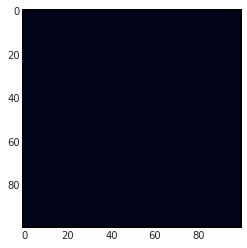

In [103]:
plt.imshow(images[15,:,:])

In [107]:
for i in range(images.shape[0]):
    fig = plt.figure(figsize=(5,5))
    fig.patch.set_alpha(1)  # 図全体の背景透明度
    ax = fig.add_subplot()
    ax.imshow(images[i,:,:])
    ax.set_axis_off()
    fig.tight_layout()
    fig.savefig("out/hiddne_images/{0:03}.png".format(i), dpi=100, transparent=False)
    plt.close(fig)

In [109]:
from PIL import Image
import os
import glob

# GIFアニメーションを作成
def create_gif(in_dir, out_filename):
    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*']))) # ファイルパスをソートしてリストする
    imgs = []                                                   # 画像をappendするための空配列を定義

    # ファイルのフルパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        img = Image.open(path_list[i])                          # 画像ファイルを1つずつ開く
        imgs.append(img)                                        # 画像をappendで配列に格納していく

    # appendした画像配列をGIFにする。durationで持続時間、loopでループ数を指定可能。
    imgs[0].save(out_filename,
                 save_all=True, append_images=imgs[1:], optimize=False, duration=20, loop=0)

# GIFアニメーションを作成する関数を実行する
create_gif(in_dir='out/hiddne_images', out_filename='out/gif/hidden.gif')

In [65]:
import cv2 as cv

def create_movie(dir_path):
    output = 'out/gif/hidden.mp4'
    fourcc = cv.VideoWriter_fourcc(*'mp4v')
    outfh = cv.VideoWriter(output, fourcc, 24, (512, 512))
    for photo_name in sorted(glob.glob(dir_path + '/*.png')):
        im = cv.imread(photo_name)
        outfh.write(im)
    outfh.release()

create_movie('out/hiddne_images')

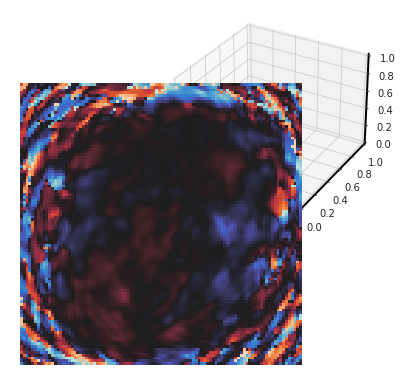

In [131]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
image_path = '/notebooks/out/pattern/ 0.png'
image = plt.imread(image_path)
im = OffsetImage(image, zoom=0.2)
x, y = 0,0
ab = AnnotationBbox(im, (x, y), xycoords='axes fraction', frameon=False)
ax.add_artist(ab)
#plt.savefig('3Dropho.jpg',dpi=150)
plt.show()

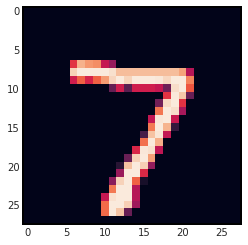

In [132]:
plt.imshow(x_test[0,:,:])